c:\Users\ellen\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


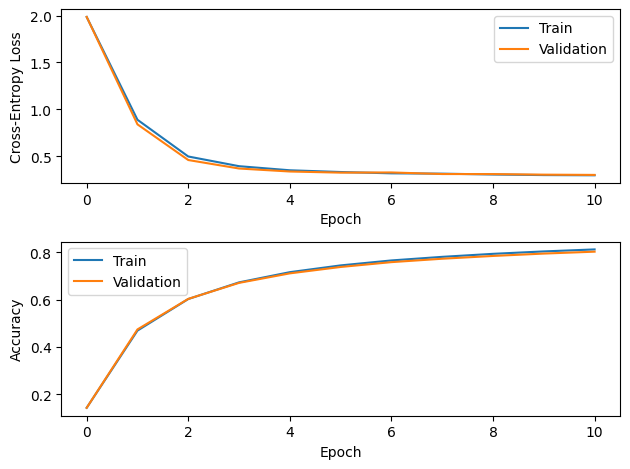

In [1]:
from model.training import train_model_and_visualize

model = train_model_and_visualize([8])

In [3]:
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods import kernelshap
from model.attribution_methods.integrated_gradients import IntegratedGradients
import importlib
import numpy as np
import torch

In [4]:
importlib.reload(kernelshap)

<module 'model.attribution_methods.kernelshap' from 'c:\\Users\\ellen\\Documents\\sose 23\\pg wissensentdeckung\\code\\repo\\Project_Group_Attribution_Method\\model\\attribution_methods\\kernelshap.py'>

In [5]:

test_dataset = DryBean(DatasetMode.TEST)
train_dataset = DryBean(DatasetMode.TRAIN)


In [6]:
from torch.utils.data import Subset

random_indices = np.random.randint(len(test_dataset), size=100)

test_dataset_small = Subset(test_dataset, random_indices)

In [7]:
kernel = kernelshap.Kernelshap(model, train_dataset)

am_eval = AttributionMethodsEvaluator(model=model)

# am_eval.visualize_log_odds_of_dataset(test_dataset_small, kernel.attribute, apply_log=False)

In [8]:
from model.training import train_autobaseline

uniform_output_baseline = train_autobaseline(model)

  0%|          | 0/300 [00:00<?, ?it/s]

c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:14<00:00, 20.62it/s]

autobaseline: tensor([ 0.0074,  0.0059,  0.0064,  0.0057,  0.0096, -0.1656,  0.0077,  0.0085,
         0.0086,  0.0085,  0.0050,  0.0065, -0.0586,  0.0081,  0.0071,  0.0058],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2271, 0.0126, 0.1077, 0.1449, 0.1460, 0.0893, 0.2723])



c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
100%|██████████| 100/100 [00:01<00:00, 93.72it/s]
c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\evaluation\utils\visualisation.py:149: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = plt.legend(handles, labels=labels,bbox_to_anchor =(0,-0.28), loc='upper center',ncols=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


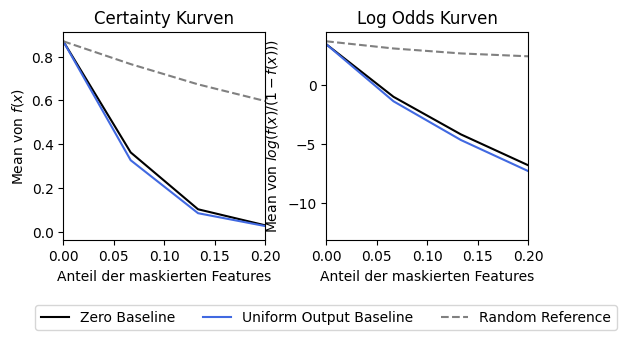

In [15]:
am_eval.visualize_comparison_log_odds_of_zero_uniform_output_baseline_for_kernelshap(uniform_output_baseline, test_dataset_small, kernel.attribute)

In [11]:
save_set = [627, 970, 1194, 739, 384, 862, 787, 1006, 912, 400, 492, 1073, 978, 1311, 269, 426, 498, 1284, 308, 1356, 585, 1202, 59, 972, 1001, 609, 109, 345, 359, 287, 605, 74, 169, 170, 1004, 794, 377, 1064, 153, 208, 1281, 1013, 1018, 613, 796, 322, 924, 1195, 929, 880, 983, 1016, 512, 359, 743, 300, 1326, 410, 179, 1269, 69, 130, 41, 688, 761, 815, 184, 104, 1245, 675, 1216, 184, 39, 68, 951, 994, 339, 234, 105, 1302, 147, 644, 649, 200, 1078, 1273, 1280, 1131, 791, 87, 259, 519, 1114, 998, 520, 646, 1021, 716, 211, 552]
save_dataset_small = Subset(test_dataset, save_set)

100%|██████████| 100/100 [00:00<00:00, 111.17it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


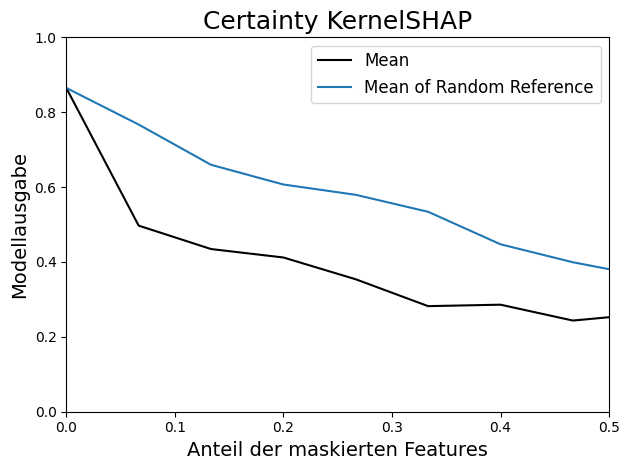

In [13]:
am_eval.visualize_log_odds_of_dataset(save_dataset_small, kernel.attribute, masking_baseline=uniform_output_baseline, title="Certainty KernelSHAP", apply_log=False)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
  1%|          | 1/100 [00:16<27:17, 16.54s/it]

tensor(0.1693, dtype=torch.float64)


  2%|▏         | 2/100 [00:35<29:25, 18.02s/it]

tensor(0.1147, dtype=torch.float64)


  3%|▎         | 3/100 [01:09<40:33, 25.09s/it]

tensor(0.2091, dtype=torch.float64)


  4%|▍         | 4/100 [01:45<47:05, 29.43s/it]

tensor(0.2257, dtype=torch.float64)


  5%|▌         | 5/100 [02:19<49:27, 31.23s/it]

tensor(0.2321, dtype=torch.float64)


  6%|▌         | 6/100 [02:54<50:49, 32.45s/it]

tensor(0.2385, dtype=torch.float64)


  7%|▋         | 7/100 [03:29<51:26, 33.19s/it]

tensor(0.0399, dtype=torch.float64)


  8%|▊         | 8/100 [04:04<52:04, 33.97s/it]

tensor(0.0736, dtype=torch.float64)


  9%|▉         | 9/100 [04:40<52:28, 34.60s/it]

tensor(0.1997, dtype=torch.float64)


 10%|█         | 10/100 [05:14<51:34, 34.38s/it]

tensor(0.2259, dtype=torch.float64)


 11%|█         | 11/100 [05:47<50:29, 34.04s/it]

tensor(0.1843, dtype=torch.float64)


 12%|█▏        | 12/100 [06:12<45:53, 31.29s/it]

tensor(0.2780, dtype=torch.float64)


 13%|█▎        | 13/100 [06:28<38:39, 26.66s/it]

tensor(0.2385, dtype=torch.float64)


 14%|█▍        | 14/100 [06:45<34:01, 23.73s/it]

tensor(0.0400, dtype=torch.float64)


 15%|█▌        | 15/100 [07:02<30:43, 21.69s/it]

tensor(0.2828, dtype=torch.float64)


 16%|█▌        | 16/100 [07:17<27:26, 19.60s/it]

tensor(0.2313, dtype=torch.float64)


 17%|█▋        | 17/100 [07:32<25:10, 18.20s/it]

tensor(0.0778, dtype=torch.float64)


 18%|█▊        | 18/100 [07:47<23:29, 17.18s/it]

tensor(0.0868, dtype=torch.float64)


 19%|█▉        | 19/100 [08:02<22:10, 16.43s/it]

tensor(0.1833, dtype=torch.float64)


 20%|██        | 20/100 [08:16<21:11, 15.89s/it]

tensor(0.2438, dtype=torch.float64)


 21%|██        | 21/100 [08:31<20:24, 15.50s/it]

tensor(0.1900, dtype=torch.float64)


 22%|██▏       | 22/100 [08:45<19:48, 15.24s/it]

tensor(0.1249, dtype=torch.float64)


 23%|██▎       | 23/100 [09:00<19:20, 15.08s/it]

tensor(0.1833, dtype=torch.float64)


 24%|██▍       | 24/100 [09:15<18:55, 14.95s/it]

tensor(0.0787, dtype=torch.float64)


 25%|██▌       | 25/100 [09:29<18:36, 14.89s/it]

tensor(0.0808, dtype=torch.float64)


 26%|██▌       | 26/100 [09:45<18:37, 15.10s/it]

tensor(0.1565, dtype=torch.float64)


 27%|██▋       | 27/100 [10:01<18:34, 15.26s/it]

tensor(0.1034, dtype=torch.float64)


 28%|██▊       | 28/100 [10:15<18:07, 15.10s/it]

tensor(0.2008, dtype=torch.float64)


 29%|██▉       | 29/100 [10:30<17:40, 14.93s/it]

tensor(0.1914, dtype=torch.float64)


 30%|███       | 30/100 [10:45<17:18, 14.84s/it]

tensor(0.1050, dtype=torch.float64)


 31%|███       | 31/100 [10:59<17:00, 14.79s/it]

tensor(0.1024, dtype=torch.float64)


 32%|███▏      | 32/100 [11:16<17:19, 15.29s/it]

tensor(0.3655, dtype=torch.float64)


 33%|███▎      | 33/100 [11:33<17:46, 15.92s/it]

tensor(0.1033, dtype=torch.float64)


 34%|███▍      | 34/100 [11:50<17:49, 16.20s/it]

tensor(0.1533, dtype=torch.float64)


 35%|███▌      | 35/100 [12:07<17:50, 16.47s/it]

tensor(0.3288, dtype=torch.float64)


 36%|███▌      | 36/100 [12:23<17:24, 16.32s/it]

tensor(0.2607, dtype=torch.float64)


 37%|███▋      | 37/100 [12:38<16:37, 15.83s/it]

tensor(0.1662, dtype=torch.float64)


 38%|███▊      | 38/100 [12:53<16:04, 15.55s/it]

tensor(0.2166, dtype=torch.float64)


 39%|███▉      | 39/100 [13:07<15:32, 15.29s/it]

tensor(0.2441, dtype=torch.float64)


 40%|████      | 40/100 [13:22<15:06, 15.11s/it]

tensor(0.3603, dtype=torch.float64)


 41%|████      | 41/100 [13:37<14:45, 15.01s/it]

tensor(0.1960, dtype=torch.float64)


 42%|████▏     | 42/100 [13:52<14:30, 15.01s/it]

tensor(0.0833, dtype=torch.float64)


 43%|████▎     | 43/100 [14:06<14:10, 14.91s/it]

tensor(0.2639, dtype=torch.float64)


 44%|████▍     | 44/100 [14:21<13:52, 14.86s/it]

tensor(0.2196, dtype=torch.float64)


 45%|████▌     | 45/100 [14:36<13:35, 14.83s/it]

tensor(0.1403, dtype=torch.float64)


 46%|████▌     | 46/100 [14:51<13:20, 14.83s/it]

tensor(0.1416, dtype=torch.float64)


 47%|████▋     | 47/100 [15:06<13:05, 14.81s/it]

tensor(0.1645, dtype=torch.float64)


 48%|████▊     | 48/100 [15:20<12:50, 14.82s/it]

tensor(0.0777, dtype=torch.float64)


 49%|████▉     | 49/100 [15:35<12:34, 14.80s/it]

tensor(0.1194, dtype=torch.float64)


 50%|█████     | 50/100 [15:50<12:20, 14.82s/it]

tensor(0.1014, dtype=torch.float64)


 51%|█████     | 51/100 [16:05<12:05, 14.80s/it]

tensor(0.1316, dtype=torch.float64)


 52%|█████▏    | 52/100 [16:20<12:00, 15.00s/it]

tensor(0.1949, dtype=torch.float64)


 53%|█████▎    | 53/100 [16:35<11:42, 14.95s/it]

tensor(0.1921, dtype=torch.float64)


 54%|█████▍    | 54/100 [16:51<11:42, 15.28s/it]

tensor(0.2506, dtype=torch.float64)


 55%|█████▌    | 55/100 [17:06<11:22, 15.17s/it]

tensor(0.1825, dtype=torch.float64)


 56%|█████▌    | 56/100 [17:21<11:01, 15.03s/it]

tensor(0.2927, dtype=torch.float64)


 57%|█████▋    | 57/100 [17:35<10:40, 14.90s/it]

tensor(0.0819, dtype=torch.float64)


 58%|█████▊    | 58/100 [17:50<10:24, 14.88s/it]

tensor(0.1421, dtype=torch.float64)


 59%|█████▉    | 59/100 [18:05<10:07, 14.82s/it]

tensor(0.1700, dtype=torch.float64)


 60%|██████    | 60/100 [18:19<09:49, 14.74s/it]

tensor(0.1745, dtype=torch.float64)


 61%|██████    | 61/100 [18:34<09:33, 14.70s/it]

tensor(0.1487, dtype=torch.float64)


 62%|██████▏   | 62/100 [18:49<09:17, 14.67s/it]

tensor(0.1760, dtype=torch.float64)


 63%|██████▎   | 63/100 [19:04<09:06, 14.78s/it]

tensor(0.2613, dtype=torch.float64)


 64%|██████▍   | 64/100 [19:18<08:50, 14.73s/it]

tensor(0.1454, dtype=torch.float64)


 65%|██████▌   | 65/100 [19:33<08:33, 14.68s/it]

tensor(0.2009, dtype=torch.float64)


 66%|██████▌   | 66/100 [19:48<08:21, 14.75s/it]

tensor(0.1925, dtype=torch.float64)


 67%|██████▋   | 67/100 [20:02<08:06, 14.73s/it]

tensor(0.1224, dtype=torch.float64)


 68%|██████▊   | 68/100 [20:17<07:49, 14.67s/it]

tensor(0.2618, dtype=torch.float64)


 69%|██████▉   | 69/100 [20:31<07:33, 14.62s/it]

tensor(0.3210, dtype=torch.float64)


 70%|███████   | 70/100 [20:46<07:20, 14.67s/it]

tensor(0.1691, dtype=torch.float64)


 71%|███████   | 71/100 [21:01<07:05, 14.66s/it]

tensor(0.1780, dtype=torch.float64)


 72%|███████▏  | 72/100 [21:16<06:50, 14.68s/it]

tensor(0.1628, dtype=torch.float64)


 73%|███████▎  | 73/100 [21:30<06:36, 14.67s/it]

tensor(0.1243, dtype=torch.float64)


 74%|███████▍  | 74/100 [21:45<06:22, 14.71s/it]

tensor(0.1040, dtype=torch.float64)


 75%|███████▌  | 75/100 [22:00<06:07, 14.70s/it]

tensor(0.1371, dtype=torch.float64)


 76%|███████▌  | 76/100 [22:14<05:52, 14.68s/it]

tensor(0.2384, dtype=torch.float64)


 77%|███████▋  | 77/100 [22:29<05:36, 14.65s/it]

tensor(0.0709, dtype=torch.float64)


 78%|███████▊  | 78/100 [22:44<05:21, 14.63s/it]

tensor(0.2047, dtype=torch.float64)


 79%|███████▉  | 79/100 [22:58<05:07, 14.62s/it]

tensor(0.1888, dtype=torch.float64)


 80%|████████  | 80/100 [23:13<04:51, 14.59s/it]

tensor(0.3076, dtype=torch.float64)


 81%|████████  | 81/100 [23:28<04:40, 14.78s/it]

tensor(0.0416, dtype=torch.float64)


 82%|████████▏ | 82/100 [23:46<04:43, 15.76s/it]

tensor(0.3082, dtype=torch.float64)


 83%|████████▎ | 83/100 [24:15<05:33, 19.62s/it]

tensor(0.1240, dtype=torch.float64)


 84%|████████▍ | 84/100 [24:37<05:28, 20.50s/it]

tensor(0.1871, dtype=torch.float64)


 85%|████████▌ | 85/100 [24:52<04:40, 18.68s/it]

tensor(0.0521, dtype=torch.float64)


 86%|████████▌ | 86/100 [25:06<04:03, 17.38s/it]

tensor(0.1441, dtype=torch.float64)


 87%|████████▋ | 87/100 [25:20<03:33, 16.46s/it]

tensor(0.0817, dtype=torch.float64)


 88%|████████▊ | 88/100 [25:34<03:09, 15.79s/it]

tensor(0.2458, dtype=torch.float64)


 89%|████████▉ | 89/100 [25:49<02:48, 15.36s/it]

tensor(0.2371, dtype=torch.float64)


 90%|█████████ | 90/100 [26:03<02:30, 15.04s/it]

tensor(0.1222, dtype=torch.float64)


 91%|█████████ | 91/100 [26:17<02:13, 14.79s/it]

tensor(0.0665, dtype=torch.float64)


 92%|█████████▏| 92/100 [26:32<01:57, 14.66s/it]

tensor(0.1584, dtype=torch.float64)


 93%|█████████▎| 93/100 [26:50<01:49, 15.70s/it]

tensor(0.0206, dtype=torch.float64)


 94%|█████████▍| 94/100 [27:28<02:14, 22.38s/it]

tensor(0.1031, dtype=torch.float64)


 95%|█████████▌| 95/100 [28:04<02:12, 26.54s/it]

tensor(0.1175, dtype=torch.float64)


 96%|█████████▌| 96/100 [28:26<01:41, 25.28s/it]

tensor(0.1467, dtype=torch.float64)


 97%|█████████▋| 97/100 [28:41<01:05, 21.99s/it]

tensor(0.1875, dtype=torch.float64)


 98%|█████████▊| 98/100 [28:55<00:39, 19.76s/it]

tensor(0.1603, dtype=torch.float64)


 99%|█████████▉| 99/100 [29:10<00:18, 18.17s/it]

tensor(0.1095, dtype=torch.float64)


100%|██████████| 100/100 [29:24<00:00, 17.65s/it]


tensor(0.0971, dtype=torch.float64)


100%|██████████| 100/100 [00:00<00:00, 236.50it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


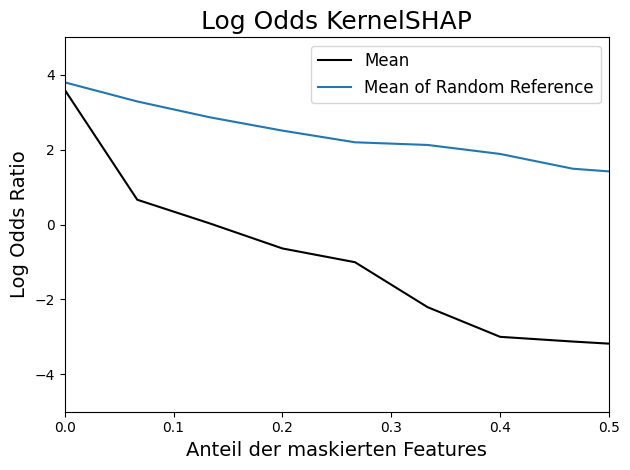

In [10]:
am_eval.visualize_log_odds_of_dataset(test_dataset_small, kernel.attribute, title="Log Odds KernelSHAP", apply_log=True)
